# Homework 2

## ASTR 5900

# Problem 1

This homework will probe your data analysis skills and propagation of errors.

The file "data_points" that you can download from Canvas contains the X and Y positions of photons.  The image that they comprise consists of a non-uniform background, and a astronomical object.  

Your goal is to determine the net number of photons in the astronomical object and the uncertainty on that net number.

Hints:
 - You will probably want to create and work on a 2-d histogram representation of the data.  That can be accomplished using `plt.hist2d`.
 - You will probably want to create a model for the background.
 
The format of the data is a "pickle file".  That can be reconstituted to the x and y data points as below.

### $\textit{Answer}:$

In [3]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats


fontsize = 20
figsize = (10,6)
dpi = 150

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
# Read in the data; this code was provided in the problem
import pickle
filename='data_points'
file=open(filename,'rb')
temp=pickle.load(file)

xdata=temp[0]
ydata=temp[1]



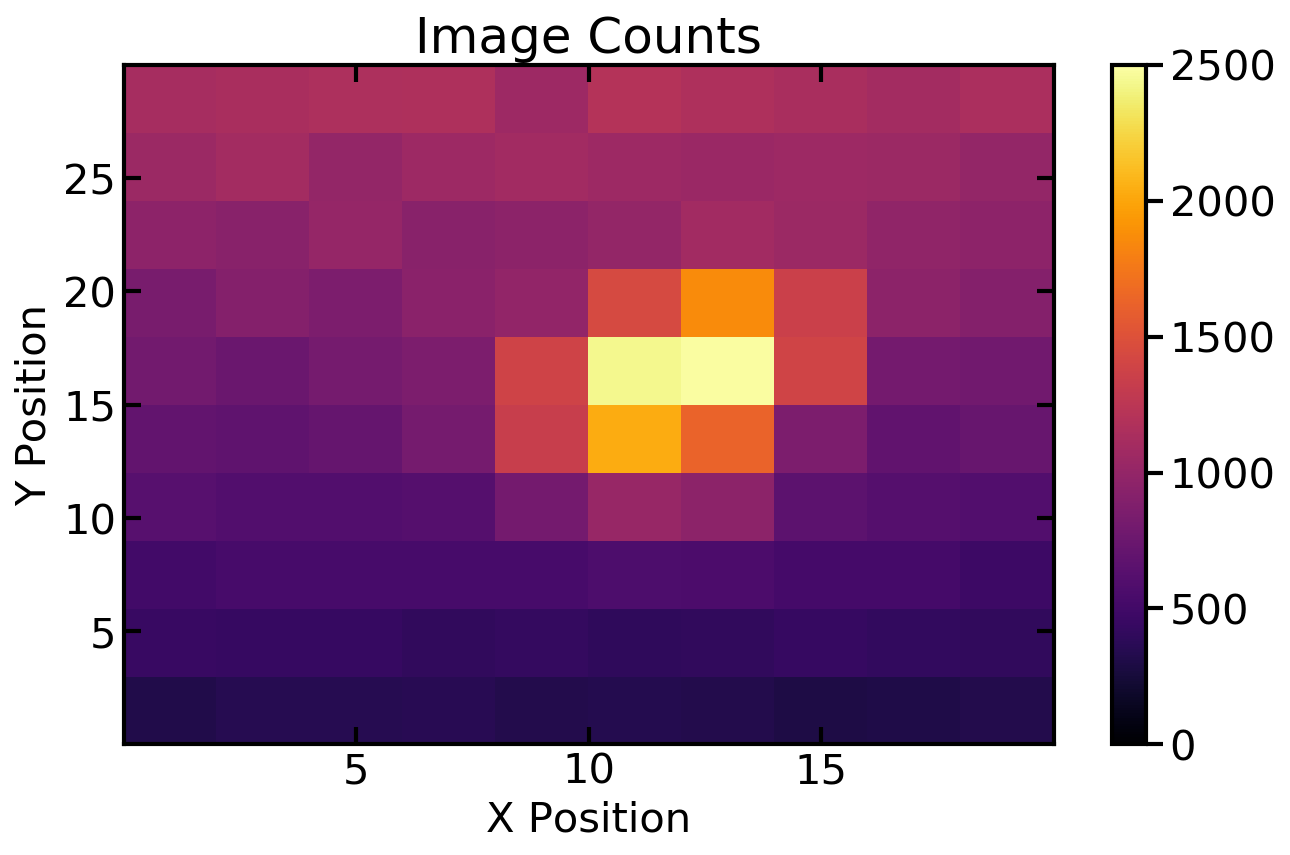

In [5]:
# Construct 2d histogram of the data 
plt.hist2d(xdata,ydata, bins = 10, cmap = 'inferno', vmin = 0, vmax = 2500)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.rcParams['ytick.direction'] = 'out'
plt.colorbar()
plt.title('Image Counts')
plt.show()

This is a visual depiction of the counts registered in each pixel (or bin, rather. As we are unsure of the instrument we can't make assumptions about the number of pixels). In our case, we have some astronomical source roughly centered at (10,15) surrounded by a nonuniform background that appears to increase in intensity along the y-axis. Our goal is to infer the number of counts coming from the astronomical object and their uncertainties.

To do this, we'll first have to model the background so we can subtract it from our data. Let's take a look at the of the histogram:

In [6]:
# Reconstruct the histogram (this time using nmumpy):
hist =  np.histogram2d(xdata,ydata)
data = hist[0]

print(data)

[[ 319.  443.  504.  630.  700.  797.  837.  964. 1051. 1115.]
 [ 347.  437.  529.  598.  674.  747.  902.  935. 1094. 1133.]
 [ 343.  437.  532.  596.  713.  819.  857. 1011. 1002. 1155.]
 [ 357.  407.  530.  617.  816.  850.  942.  929. 1059. 1169.]
 [ 332.  421.  528.  810. 1330. 1380.  993.  955. 1093. 1064.]
 [ 339.  395.  575. 1025. 2038. 2437. 1437.  997. 1059. 1209.]
 [ 331.  408.  559.  951. 1628. 2483. 1859. 1090. 1043. 1171.]
 [ 300.  431.  521.  662.  852. 1388. 1350. 1054. 1062. 1139.]
 [ 310.  418.  518.  623.  686.  810.  954.  981. 1045. 1098.]
 [ 323.  410.  470.  600.  723.  784.  904.  963.  999. 1147.]]


Each row in the above data set corresponds to a column in the above 2d histogram. As expected, we see that the counts increase gradually with position on the y-axis. Let's take a look at the y-axis values:

In [7]:
ybins = hist[2] # np.histogram2d [1] and [2] contain x and y bin info, respectively
y_centers = 0.5*(ybins[:-1]+ybins[1:])
y_centers

array([ 1.50079115,  4.50069359,  7.50059602, 10.50049846, 13.50040089,
       16.50030333, 19.50020577, 22.5001082 , 25.50001064, 28.49991307])

The background looks roughly uniform along the x-axis; let's average together all of the y-values and plot the average count value versus y-axis position

Text(0, 0.5, 'Average Value')

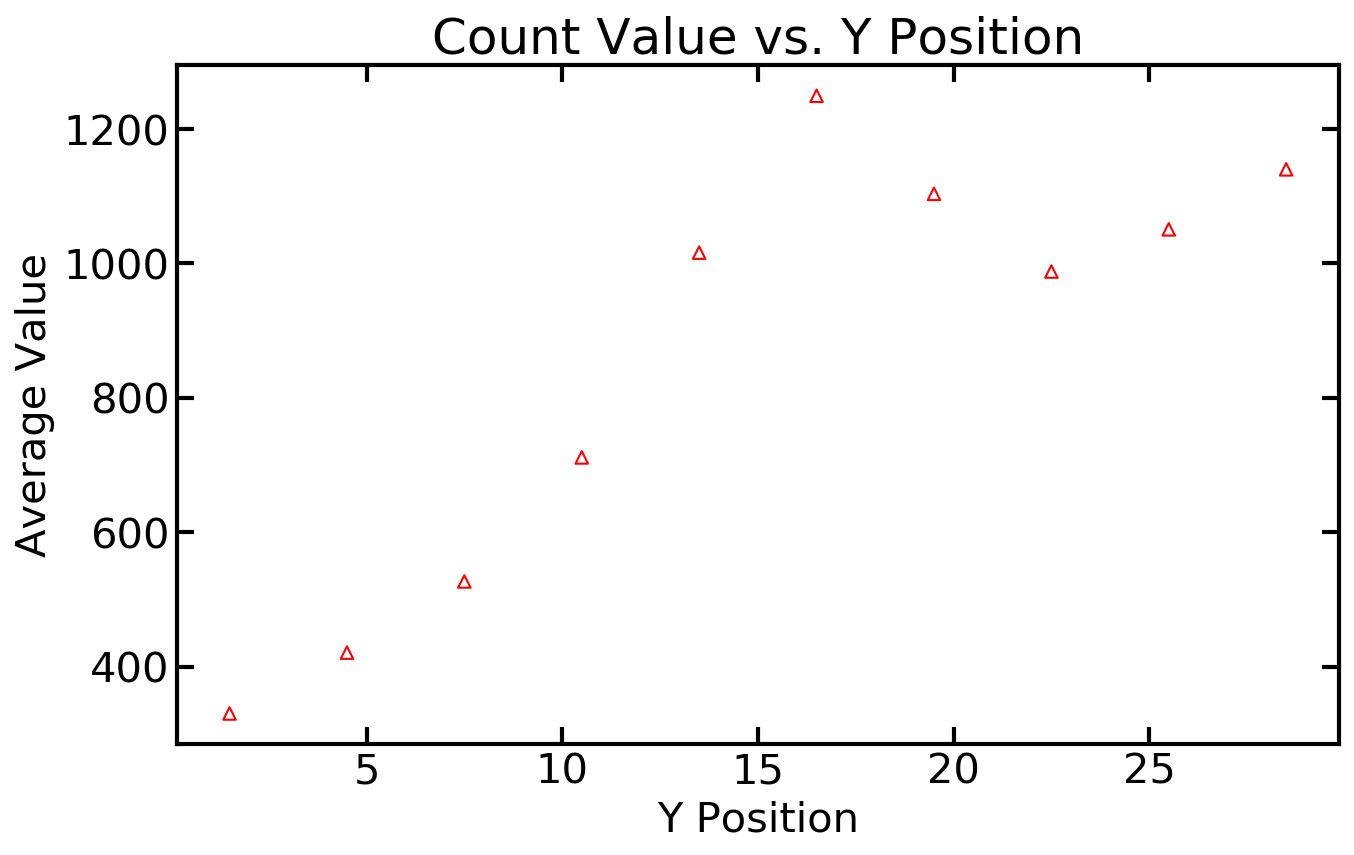

In [8]:
plt.rcParams['ytick.direction'] = 'in'
y_avg = np.mean(data, axis = 0)
plt.scatter(y_centers,y_avg, marker = '^', color = 'red', facecolor = 'none')
plt.title('Count Value vs. Y Position')
plt.xlabel('Y Position')
plt.ylabel('Average Value')

It looks like the counts increase linearily with the y-value. The exception to this is where the source is (from roughly y = 10 through y = 20). We'll exclude those regions and then fit a line to the background:

Text(0.5, 1.0, 'Count Value vs. Y Position')

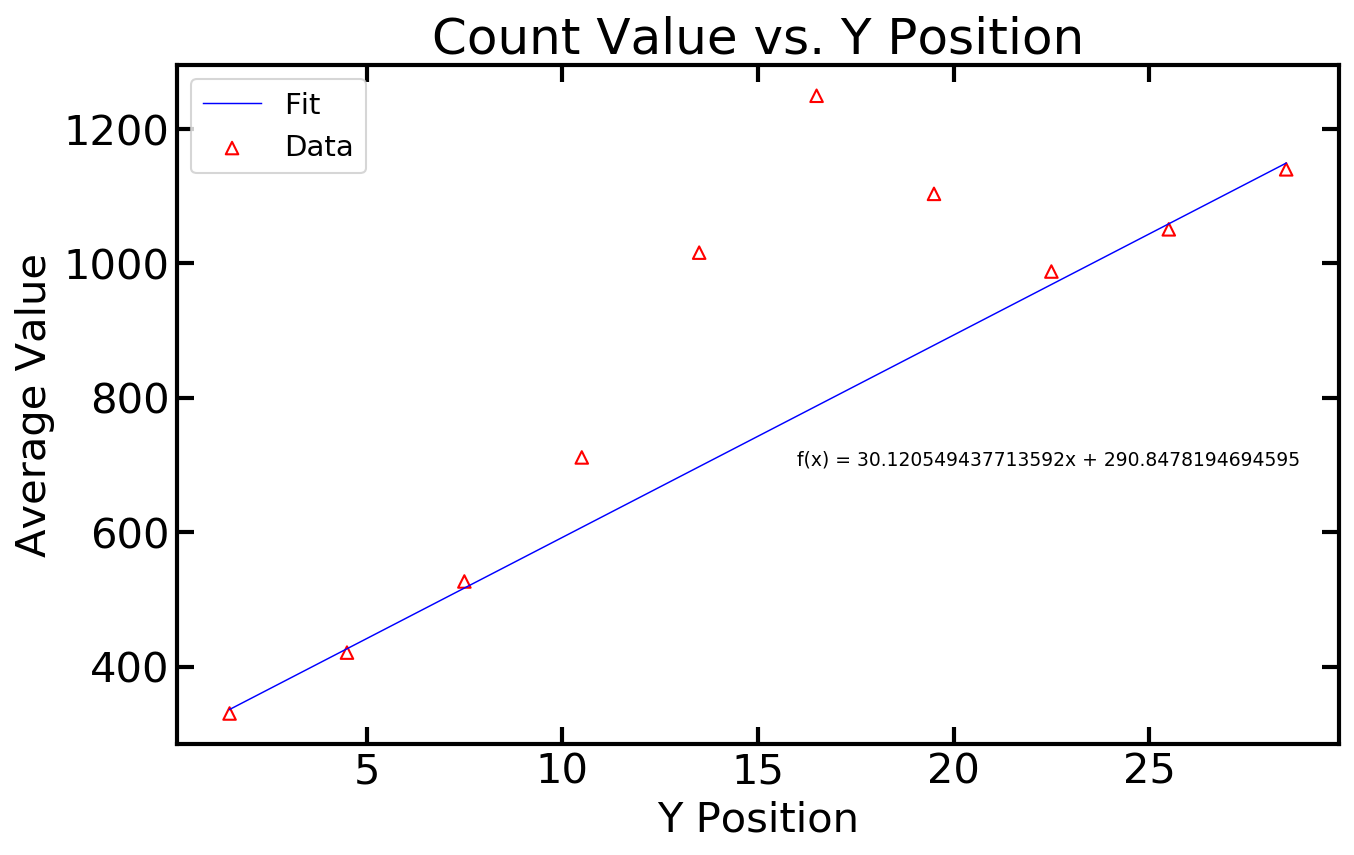

In [9]:
# Select regions away from the source:

cut_centers = np.append(y_centers[:3],y_centers[7:])
cut_y = np.append(y_avg[:3],y_avg[7:])

# Fit the sliced data
def func(m,y,b):
    return (m*y) + b

popt, pcov = scipy.optimize.curve_fit(func, cut_centers, cut_y)

# Plot
plt.figure(dpi = 150)
plt.scatter(y_centers,y_avg, marker = '^', color = 'red', facecolor = 'none', label = 'Data')
plt.plot(cut_centers, func(popt[0],cut_centers,popt[1]),label = 'Fit', color = 'blue',linewidth = '0.7')
plt.legend(fontsize = 14)
plt.text(16, 700, 'f(x) = '+ str(popt[0])+'x + ' + str(popt[1]), fontsize = 9) 
plt.xlabel('Y Position')
plt.ylabel('Average Value')
plt.title('Count Value vs. Y Position')


We now have a model for the background value as a function of Y. Let's construct the background:

In [10]:
# Extract error information from the fit:
perr = np.sqrt(np.diag(pcov))
print(perr)

[0.49815653 9.20246295]


In [11]:
# Null array to populate
background = np.zeros((len(data),len(data[0])))
background

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
# Loop through each axis; evaluate linear function w/ fit params for each y-value
for i in range(0,len(background)):
    for j in range(0,len(background[0])):
        background[i][j] = func(popt[0],y_centers[j],popt[1])
print(background)

[[ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]
 [ 336.05247347  426.4111831   516.76989274  607.12860237  697.487312
   787.84602164  878.20473127  968.5634409  1058.92215054 1149.28086017]

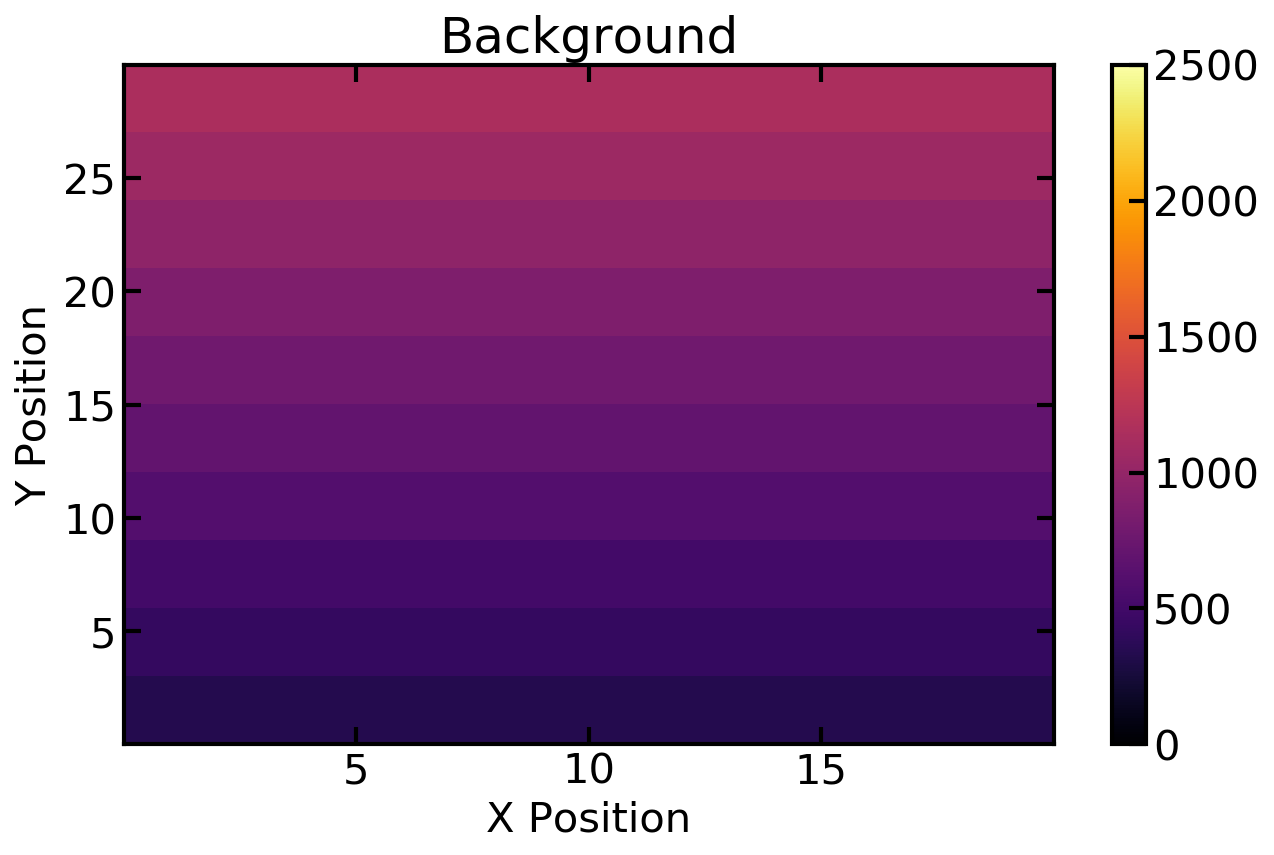

In [13]:
# Visual appearence of background
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(hist[1], hist[2], np.transpose(background), cmap = 'inferno', vmin = 0, vmax = 2500)
fig.colorbar(pc)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Background')

plt.show()

Now we can subtract this model from our original image:

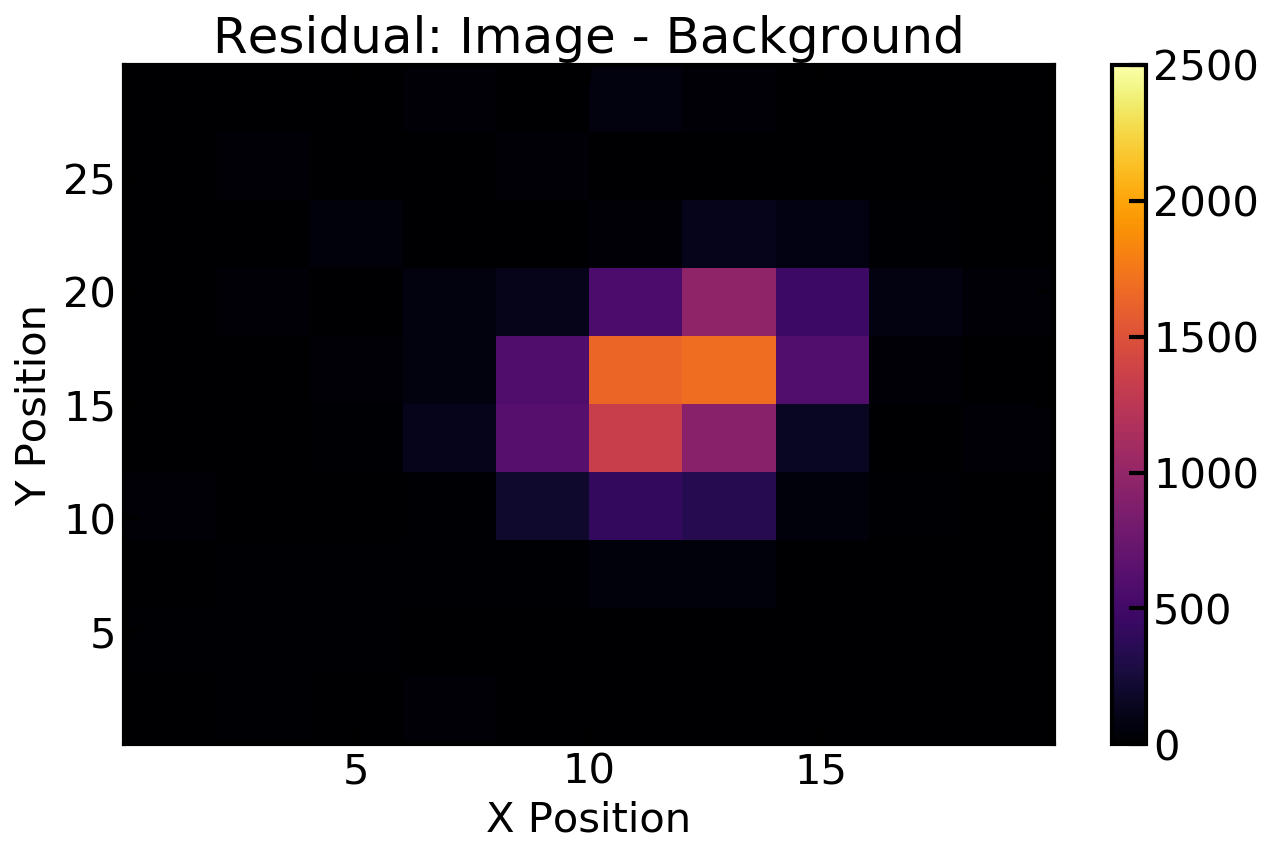

In [14]:
# Subtract background from image

sub = data - background

# Negative count values non-physical, discard:
for i in range(0,len(background)):
    for j in range(0,len(background[0])):
        if sub[i][j] < 0:
            sub[i][j] = 0

fig, ax = plt.subplots(1)
pc = ax.pcolorfast(hist[1], hist[2], np.transpose(sub), cmap = 'inferno', vmin = 0, vmax = 2500)
fig.colorbar(pc)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Residual: Image - Background')
plt.show()


In [15]:
# In matrix form:
print(sub)

[[0.00000000e+00 1.65888169e+01 0.00000000e+00 2.28713976e+01
  2.51268800e+00 9.15397836e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.09475265e+01 1.05888169e+01 1.22301073e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.37952687e+01 0.00000000e+00
  3.50778495e+01 0.00000000e+00]
 [6.94752653e+00 1.05888169e+01 1.52301073e+01 0.00000000e+00
  1.55126880e+01 3.11539784e+01 0.00000000e+00 4.24365591e+01
  0.00000000e+00 5.71913983e+00]
 [2.09475265e+01 0.00000000e+00 1.32301073e+01 9.87139763e+00
  1.18512688e+02 6.21539784e+01 6.37952687e+01 0.00000000e+00
  7.78494631e-02 1.97191398e+01]
 [0.00000000e+00 0.00000000e+00 1.12301073e+01 2.02871398e+02
  6.32512688e+02 5.92153978e+02 1.14795269e+02 0.00000000e+00
  3.40778495e+01 0.00000000e+00]
 [2.94752653e+00 0.00000000e+00 5.82301073e+01 4.17871398e+02
  1.34051269e+03 1.64915398e+03 5.58795269e+02 2.84365591e+01
  7.78494631e-02 5.97191398e+01]
 [0.00000000e+00 0.00000000e+00 4.22301073e+01 3.43871398e

We can now sub up the remaining flux in our background-subtracted image. The background is almost entierely subtracted, but we'll sum up over an 'aperature' roughly where the source is by array slicing:

In [16]:
source_counts = np.sum(sub[3:8])
print('Total Counts from Source: ' + str(np.int(source_counts)))

Total Counts from Source: 11526


We'll model the error from the source as poisson noise: 

In [17]:
source_err = np.sqrt(source_counts)
background_err = np.sqrt(np.sum(background))
err = np.sqrt(source_err**2 + background_err**2)
err

292.9039881027351

Thus, our estimate for the toal number of counts coming from the source is given by 
$$ \boxed{N = 11526 \pm 293.67} $$

# Problem 2

In this problem we will be playing with bivariate Gaussian distributions.  Let's interpret the 2 random variables as the positions of 2 particles in a 1D well ($X_1, X_2$).

The mean and variance of the position of particle 1 is $\mu_1 = 3$, $\sigma^2_1 = 1.5$.  For particle 2 we have $\mu_2 = 2$ and $\sigma^2_2 = 5$.  The positions for both particles are distributed normally.

### Part A



Determine the probability that $-1 \leq x_1 \leq 3$ AND $ 1 \leq x_2 \leq 4$.  Assume the positions of the particles are distributed as described above, and that the random variables are independent.  Calculate this probability by sampling $10^4$ points from the relevant distribution(s), and finding the fraction of sampled points that meet the criteria.  Use routines from [`numpy.random` (this is a hyperlink)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) to sample.  Plot the sampled points on a simple scatter plot with `matplotlib.pyplot` (Plot $x_2$ vs $x_1$).

Note: remember the difference between variance and standard deviation.

### $\textit{Answer}:$ 

We'll start by consturcting the relevant bivariate Gaussian Distribution. Since the results are independent in this problem, we set the covarience equal to zero.  we can just sample a single bivariate distribution 10,000 times, and then use our friend `np.where` to pluck out the number of occurences where
$$ -1 \leq x_1 \leq 3  \& 1  \leq x_2 \leq 4 $$

In [18]:
mu = (3,2)
cov = [[1.5, 0], [0,5]] # covarience matrix: off diagonals are covarience; diagonals are variance 
draws = 10000
frac = np.zeros(draws)

#10,000 draws, 10,000 times:
for i in range(0,len(frac)):
    x = np.random.multivariate_normal(mu, cov, draws)
    here = np.where( (((x[:,0] >= -1) & (x[:,0] <= 3))) & ((x[:,1] >=1) & (x[:,1] <= 4)) )[0]
    frac[i] = len(here) / draws

frac

array([0.2455, 0.2402, 0.2415, ..., 0.2467, 0.2475, 0.2443])

In [19]:
# Average them
avg_frac = np.mean(frac)
print('Average fraction of draws that meet crietia: ' + str(avg_frac))

Average fraction of draws that meet crietia: 0.24327507999999998


Text(0.5, 1.0, 'Bivariate Distribtution: 10,000 draws of independent Variables')

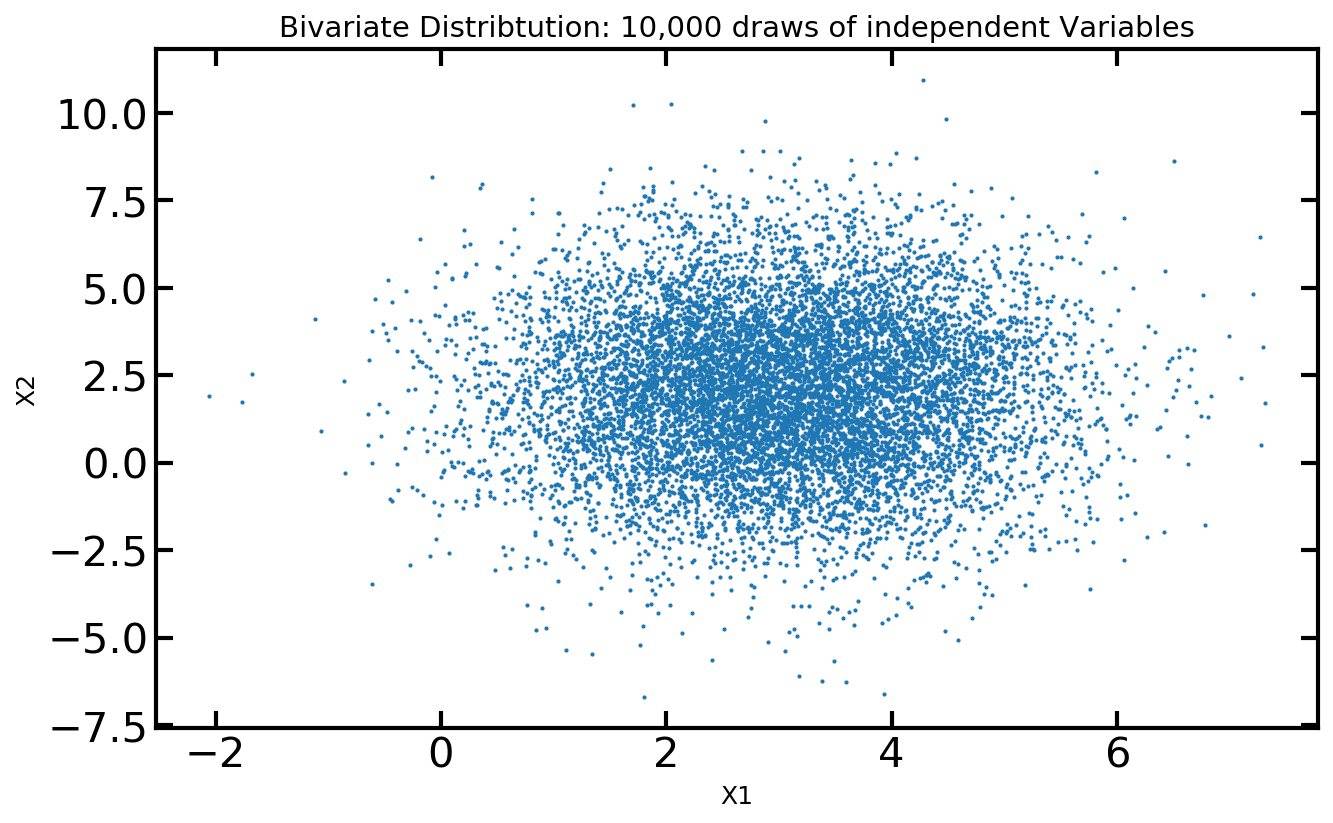

In [20]:
# Plot
plt.scatter(x[:,0],x[:,1], s = 1)
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.title('Bivariate Distribtution: 10,000 draws of independent Variables', fontsize = 14)

So for 10,000 draws, $\textbf{about 24%}$ of them meet the criteria stated above.

_________________________________________________________________

### Part B

Calculate the probability of the same criteria, except now assume the positions are not independent (maybe the particles interact).  Use $\text{Cov}(X_1, X_2) = 2$.  Again there is a relevant `numpy.random` routine that will allow you to do the relevant sampling. Plot the sampled points.

Hint: This amounts to off-diagonal terms in the covariance matrix.  If you sampled from two independent 1D Gaussians in Part A, you should realize you can no longer do the same thing in this section.

### $\textit{Answer}:$

Now the two particle positions are no longer independent, i.e., to covarience is nonzero. This time we'll keep track of the number of times the particle meets the first critiera, and for those cases, the number of times the second particle meets the second criteria:

In [21]:
# New approach: ticker

cov = [[1.5, 2], [2,5]] # New covarience 
tick_1 = 0 # tally for when particle 1 criteria is met
tick_2 = 0 # tally for when particle 2 criteria is met, *given that particle 1 meets its criteria*
draws = 10000
frac_2 = np.zeros(draws) # This will be a joint probability: P(a)*P(b|a)

x1 = np.zeros(draws)
x2 = np.zeros(draws)


for i in range(0,draws):
    x = np.random.multivariate_normal(mu, cov, 1) # Single draw
    x1[i] = x[:,0]
    x2[i] = x[:,1]
    if ((x[:,0] >= -1) & (x[:,0] <= 3)):
        tick_1 = tick_1 + 1 
        if ((x[:,1] >=1) & (x[:,1] <= 4)):
            tick_2 = tick_2 +1
            


In [22]:
frac_2 = (tick_1/draws)* (tick_2/draws)
print('Fraction of draws of draws that meet crietia: ' + str(frac_2))

Fraction of draws of draws that meet crietia: 0.10276284000000001


Text(0.5, 1.0, 'Bivariate Distribtution: Dependent Variable')

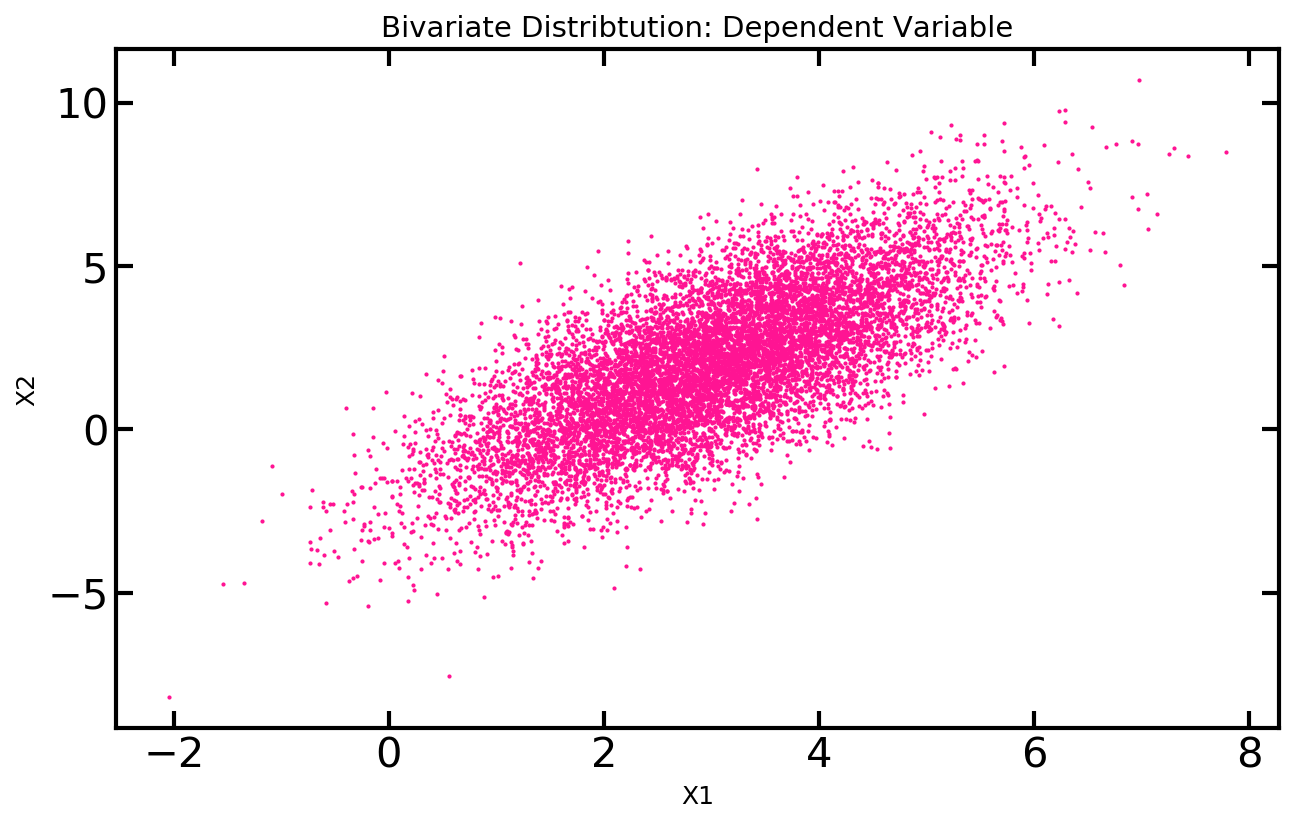

In [23]:
# Plot
plt.scatter(x1,x2, s = 1, color = 'deeppink')
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.title('Bivariate Distribtution: Dependent Variable', fontsize = 14)

So for this case, our fraction is now only $\textbf{10 %}$.
___________________________________________________________________________________________________________

### Part C

You should have received different answers in both parts (and why not?  the shapes of the plotted distributions are different).  Let's do something a little different now.

Rotate your original coordinate system such that the covariance matrix in Part B is diagonalized.  Either rotate your data in Part B in this manner or generate a new set of points from the diagonalized covariance.  If you choose the latter method, make sure you rotate the mean position too!

Now calculate the probability that $u_1 < 0$ AND $u_2 < 0$ where $\{u_i\}$ is your new coordinate system.

Finally, succinctly explain what $u_1, u_2$ are in terms of the original coordinates $x_1, x_2$.

###  $\textit{Answer}: $
Our first task is to diagonalize our covarience matrix.If we seek the diagonalized matrix $A_D$, we can construct it with a similarity transformation:
$$ A_D = U^{-1} A U $$
Where A in this case is our covarience matrix and U is some unitary matrix. We can construct a unitary matrix our the eigenvectors of our covarience matrix:

In [24]:
# Recall mean and covarience from part b:
cov_1 = [[1.5, 2], [2,5]]
mu_1 = (3,2)

# Get Eigenvalues and Eigenvectors:
eigvals, eigvecs = np.linalg.eig(cov_1)
eigvals, eigvecs

# Construct the unitary matrix: 
U = [(eigvecs[0],eigvecs[1])]
U_inv = np.linalg.inv(U)
print(U,U_inv)

[(array([-0.91063291, -0.41321628]), array([ 0.41321628, -0.91063291]))] [[[-0.91063291  0.41321628]
  [-0.41321628 -0.91063291]]]


In [25]:
# Evaluate Inner Product:

interm = np.matmul(cov_1,U)[0]

cov_2 = np.matmul(U_inv,interm)[0]
print(cov_2)

[[5.92463547e-01 4.44089210e-16]
 [1.38777878e-16 5.90753645e+00]]


Before we can draw from the rotated distibution, we need to rotate our mean as well:
$$ \mu_R = U \mu $$

In [26]:
# Rotate our mean:
mu_2 = np.matmul(U,mu_1)[0] # like the pokemon!
print(mu_2)

[-3.55833131 -0.58161698]


We now have a rotated mean and covarience. To find the probability that $u_1 < 0$ AND $u_2 < 0$, we just repeat the above procedure with a new data-set:

In [27]:
draws = 10000
frac_3 = np.zeros(draws)

#10,000 draws, 10,000 times:
for i in range(0,len(frac_3)):
    x_rot = np.random.multivariate_normal(mu_2, cov_2, draws)
    here = np.where( (x_rot[:,0] < 0) & ((x_rot[:,1] <0)))[0]
    frac_3[i] = len(here) / draws

print('Fraction of draws of draws that meet crietia: ' + str(np.mean(frac_3)))

Fraction of draws of draws that meet crietia: 0.59463285


And for this case, the fraction is almost $\textbf{60%}$

Text(0.5, 1.0, 'Rotated Distribtution: Dependent Variable')

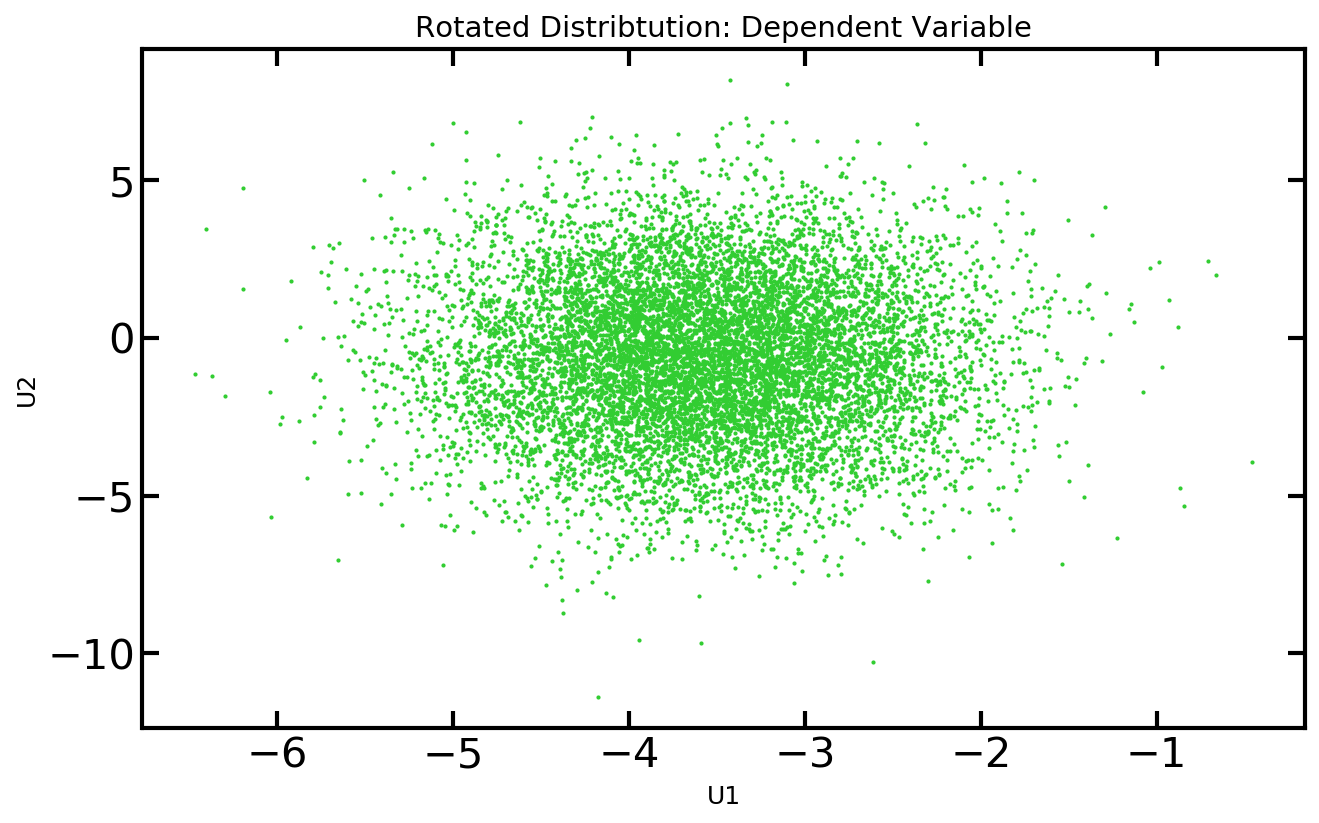

In [28]:
# Plot the new distribtuion 
plt.scatter(x_rot[:,0],x_rot[:,1], color = 'limegreen', s = 1)


plt.xlabel('U1', fontsize = 12)
plt.ylabel('U2', fontsize = 12)
plt.title('Rotated Distribtution: Dependent Variable', fontsize = 14)

In effect, we've rotated our $X_1$ and $X_2$ values by some ammount. As evident from the clumpiness of the above plot and the zero-value off-diagonal terms of our rotated covarience matrix, we've lost covarience between the two values.